In [50]:
import re 
from sklearn.metrics import confusion_matrix

List = []
with open('clusters.txt','r') as file:    
    for line in file:        
        for word in line.split():            
            List.append(word)

# open file in read mode 
fn = open('relevant.fasta', 'r') 
  
# open other file in write mode 
fn1 = open('sequenceLabels.txt', 'w') 
  
# read the content of the file line by line 
cont = fn.readlines() 
type(cont) 
for i in range(0, len(cont)): 
    if(i % 2 == 0): 
        fn1.write(cont[i]) 
    else: 
        pass
  
# close the file 
fn1.close() 


labelList = []
with open('sequenceLabels.txt','r') as file:    
    for line in file:        
        for word in line.split():
            if re.search("Worm",word): 
                labelList.append("Worm")
            if re.search("Trojan",word): 
                labelList.append("Trojan")
            if re.search("PUP",word): 
                labelList.append("PUP")

In [103]:
predictedLabelList = [None] * len(labelList)
for i in range(0,(len(List)-1)):
    if(i % 2 == 0):
        sequence_num = List[i]
        predictedLabelList[(int(sequence_num))-1] = List[i+1]

In [190]:
counter = []
clusterLabels = []
for i in set(predictedLabelList):
    print(i)
    worm_counter = 0
    trojan_counter = 0
    pup_counter = 0
    clusterLabels.append(i)
    for (item1,item2) in zip(predictedLabelList, labelList):
        if(i == item1):
            if(item2 == "Worm"):
                worm_counter = worm_counter + 1
            if(item2 == "Trojan"):
                trojan_counter = trojan_counter + 1
            if(item2 == "PUP"):
                pup_counter = pup_counter + 1
    counter.append([worm_counter,trojan_counter,pup_counter])

print(clusterLabels)
print(type(clusterLabels[1]))

5
4
51
2
1
['5', '4', '51', '2', '1']
<class 'str'>


In [163]:
counter

[[4, 7, 1], [11, 2, 0], [0, 1, 0], [18, 22, 34], [2, 0, 0]]

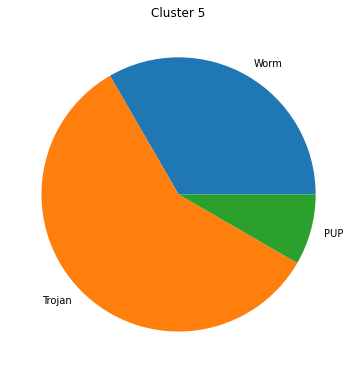

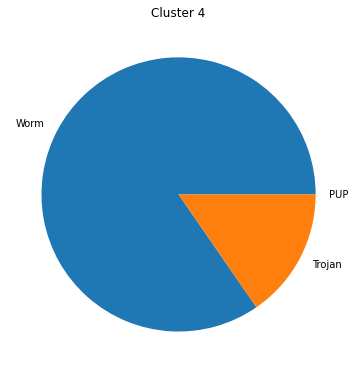

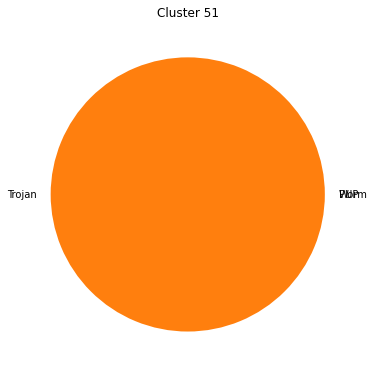

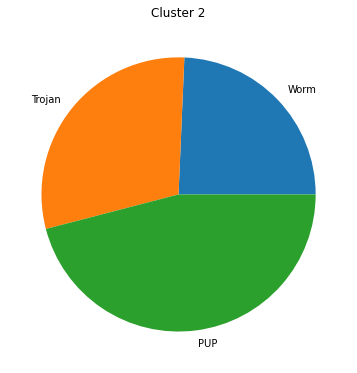

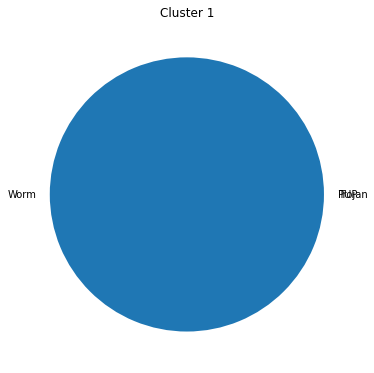

In [185]:
index = -1
for i in counter:
    index = index + 1
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie(i, labels = ['Worm','Trojan','PUP']) 
    # show plot
    fig.autofmt_xdate()
    plt.title("Cluster " + str(clusterLabels[index]))
    plt.show() 